https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset?resource=download

In [8]:
import pandas as pd

# Load the dataset to take a quick look and understand its structure
data_path = 'diabetes_012_health_indicators_BRFSS2015.csv'
data = pd.read_csv(data_path)

data.head()


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [9]:
import numpy as np

class NeuralNetwork:
    def __init__(self, layer_dims):
        self.parameters = {}
        self.L = len(layer_dims)
        np.random.seed(3)
        for l in range(1, self.L):
            self.parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * 0.01
            self.parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
    
    def linear_forward(self, A, W, b):
        Z = np.dot(W, A) + b
        cache = (A, W, b)
        return Z, cache

    def sigmoid(self, Z):
        A = 1 / (1 + np.exp(-Z))
        cache = Z
        return A, cache
    
    def forward_propagation(self, X):
        caches = []
        A = X
        L = self.L - 1
        for l in range(1, L):
            A_prev = A 
            A, cache = self.linear_forward(A_prev, self.parameters['W' + str(l)], self.parameters['b' + str(l)])
            A, activation_cache = self.sigmoid(A)
            cache += (activation_cache,)
            caches.append(cache)
        
        # Output layer
        ZL, cache = self.linear_forward(A, self.parameters['W' + str(L)], self.parameters['b' + str(L)])
        AL, activation_cache = self.sigmoid(ZL)
        cache += (activation_cache,)
        caches.append(cache)
        
        assert(AL.shape == (1, X.shape[1]))
        return AL, caches
    
    def compute_cost(self, AL, Y):
        m = Y.shape[1]
        cost = -(1./m) * np.sum(np.multiply(Y, np.log(AL)) + np.multiply(1-Y, np.log(1-AL)))
        cost = np.squeeze(cost)
        assert(cost.shape == ())
        return cost
    
    def linear_backward(self, dZ, cache):
        A_prev, W, b = cache
        m = A_prev.shape[1]
        dW = (1/m) * np.dot(dZ, A_prev.T)
        db = (1/m) * np.sum(dZ, axis=1, keepdims=True)
        dA_prev = np.dot(W.T, dZ)
        
        return dA_prev, dW, db
    
    def sigmoid_backward(self, dA, cache):
        Z = cache
        s = 1/(1+np.exp(-Z))
        dZ = dA * s * (1-s)
        return dZ
    
    def backward_propagation(self, AL, Y, caches):
        grads = {}
        L = self.L - 1
        m = AL.shape[1]
        Y = Y.reshape(AL.shape)
        
        dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
        
        current_cache = caches[-1]
        grads["dA" + str(L)], grads["dW" + str(L)], grads["db" + str(L)] = self.linear_backward(
            self.sigmoid_backward(dAL, current_cache[-1]), current_cache[:-1])
        
        for l in reversed(range(L-1)):
            current_cache = caches[l]
            dA_prev_temp, dW_temp, db_temp = self.linear_backward(
                self.sigmoid_backward(grads["dA" + str(l + 2)], current_cache[-1]), current_cache[:-1])
            grads["dA" + str(l + 1)] = dA_prev_temp
            grads["dW" + str(l + 1)] = dW_temp
            grads["db" + str(l + 1)] = db_temp
        
        return grads
    
    def update_parameters(self, grads, learning_rate):
        for l in range(self.L-1):
            self.parameters["W" + str(l+1)] -= learning_rate * grads["dW" + str(l+1)]
            self.parameters["b" + str(l+1)] -= learning_rate * grads["db" + str(l+1)]
    
    def train(self, X, Y, learning_rate=0.0075, num_iterations=3000, print_cost=False):
        np.random.seed(1)
        costs = []
        
        for i in range(0, num_iterations):
            AL, caches = self.forward_propagation(X)
            cost = self.compute_cost(AL, Y)
            grads = self.backward_propagation(AL, Y, caches)
            self.update_parameters(grads, learning_rate)
            
            if print_cost and i % 100 == 0 or i == num_iterations - 1:
                print ("Cost after iteration %i: %f" %(i, cost))
                costs.append(cost)
                
        return costs
    
   


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Convert Diabetes_012 into a binary target variable if necessary
# For simplicity, we'll consider 0 as no diabetes and 1 & 2 as having diabetes
data['Diabetes_012'] = data['Diabetes_012'].apply(lambda x: 1 if x > 0 else 0)

# Separate features and target variable
X = data.drop('Diabetes_012', axis=1)
Y = data['Diabetes_012'].values.reshape(-1, 1)

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

# Check the shape of the processed datasets to determine the network's input layer size
X_train.shape, Y_train.shape


((202944, 21), (202944, 1))

In [11]:
class NeuralNetworkForDiabetes(NeuralNetwork):
    def __init__(self, layer_dims):
        super().__init__(layer_dims)
    
    def predict(self, X):
        AL, _ = self.forward_propagation(X)
        predictions = AL > 0.5
        return predictions
    
    def accuracy(self, predictions, Y):
        return np.mean(predictions == Y) * 100

# Define the layer dimensions: input layer (21 features), 1 hidden layer (10 neurons), and output layer (1 neuron)
layer_dims = [21, 10, 1]

# Initialize the neural network
nn = NeuralNetworkForDiabetes(layer_dims)

# Train the neural network with the training data
costs = nn.train(X_train.T, Y_train.T, learning_rate=0.01, num_iterations=2000, print_cost=True)

# Generate predictions for the test set
predictions = nn.predict(X_test.T)

# Calculate the accuracy on the test set
accuracy = nn.accuracy(predictions, Y_test.T)
accuracy


Cost after iteration 0: 0.700081
Cost after iteration 100: 0.496210
Cost after iteration 200: 0.451497
Cost after iteration 300: 0.437790
Cost after iteration 400: 0.431971
Cost after iteration 500: 0.428536
Cost after iteration 600: 0.425907
Cost after iteration 700: 0.423577
Cost after iteration 800: 0.421373
Cost after iteration 900: 0.419232
Cost after iteration 1000: 0.417132
Cost after iteration 1100: 0.415063
Cost after iteration 1200: 0.413024
Cost after iteration 1300: 0.411015
Cost after iteration 1400: 0.409035
Cost after iteration 1500: 0.407086
Cost after iteration 1600: 0.405170
Cost after iteration 1700: 0.403287
Cost after iteration 1800: 0.401439
Cost after iteration 1900: 0.399627
Cost after iteration 1999: 0.397870


84.34839167455061

In [12]:
class NeuralNetworkForDiabetes(NeuralNetwork):
    def __init__(self, layer_dims):
        super().__init__(layer_dims)
    
    def predict(self, X):
        AL, _ = self.forward_propagation(X)
        predictions = AL > 0.5
        return predictions
    
    def accuracy(self, predictions, Y):
        return np.mean(predictions == Y) * 100

# Define the layer dimensions: input layer (21 features), 1 hidden layer (10 neurons), and output layer (1 neuron)
layer_dims = [21, 10, 1]

# Initialize the neural network
nn = NeuralNetworkForDiabetes(layer_dims)

# Train the neural network with the training data
costs = nn.train(X_train.T, Y_train.T, learning_rate=0.01, num_iterations=2000, print_cost=True)

# Generate predictions for the test set
predictions = nn.predict(X_test.T)

# Calculate the accuracy on the test set
accuracy = nn.accuracy(predictions, Y_test.T)
accuracy


Cost after iteration 0: 0.700081
Cost after iteration 100: 0.496210
Cost after iteration 200: 0.451497
Cost after iteration 300: 0.437790
Cost after iteration 400: 0.431971
Cost after iteration 500: 0.428536
Cost after iteration 600: 0.425907
Cost after iteration 700: 0.423577
Cost after iteration 800: 0.421373
Cost after iteration 900: 0.419232
Cost after iteration 1000: 0.417132
Cost after iteration 1100: 0.415063
Cost after iteration 1200: 0.413024
Cost after iteration 1300: 0.411015
Cost after iteration 1400: 0.409035
Cost after iteration 1500: 0.407086
Cost after iteration 1600: 0.405170
Cost after iteration 1700: 0.403287
Cost after iteration 1800: 0.401439
Cost after iteration 1900: 0.399627
Cost after iteration 1999: 0.397870


84.34839167455061

In [14]:
def train_with_minibatch(self, X, Y, learning_rate=0.0075, num_iterations=3000, minibatch_size=64, print_cost=False):
    np.random.seed(1)
    costs = []
    
    for i in range(0, num_iterations):
        # Shuffle and partition the training data into mini-batches
        permutation = list(np.random.permutation(X.shape[1]))
        shuffled_X = X[:, permutation]
        shuffled_Y = Y[:, permutation].reshape((1, X.shape[1]))
        
        num_minibatches = int(np.floor(X.shape[1] / minibatch_size))
        for k in range(0, num_minibatches):
            minibatch_X = shuffled_X[:, k*minibatch_size : (k+1)*minibatch_size]
            minibatch_Y = shuffled_Y[:, k*minibatch_size : (k+1)*minibatch_size]
            
            # Forward propagation
            AL, caches = self.forward_propagation(minibatch_X)
            
            # Compute cost
            cost = self.compute_cost(AL, minibatch_Y)
            
            # Backward propagation
            grads = self.backward_propagation(AL, minibatch_Y, caches)
            
            # Update parameters
            self.update_parameters(grads, learning_rate)
        
        # Print the cost every 100 training examples
        if print_cost and i % 100 == 0:
            print("Cost after iteration %i: %f" %(i, cost))
            costs.append(cost)
    
    return costs


nn = NeuralNetwork([21, 10, 1])  

costs = nn.train_with_minibatch(X_train.T, Y_train.T, learning_rate=0.01, num_iterations=100, minibatch_size=64, print_cost=True)



Cost after iteration 0: 0.362862


By employing mini-batch gradient descent, training becomes more manageable and efficient, especially for large datasets like the one we're working with. This method balances the computational efficiency of batch processing with the stochastic nature of SGD, leading to faster convergence in many cases.

The choice of mini-batch size can significantly affect the performance and convergence rate of the neural network. Smaller batches can lead to faster convergence but may increase the variability of the updates and potentially lead to less stable convergence. Larger batches provide more stable gradient estimates but may result in slower convergence and increased computational cost per update.

PART 2:
Task 1:
For this task, I'll choose PyTorch as the Deep Learning Framework for implementing the 2-layer neural network. PyTorch is known for its ease of use, flexibility, and dynamic computational graph, which makes it a popular choice for both academic research and industry applications.
I used  https://pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html as a resource for this.
Understanding of PyTorch's Core Concepts: To implement a 2-layer NN, it's crucial to grasp how PyTorch handles tensor operations, gradients, and the dynamic computation graph.
Forward and Backward Propagation: The tutorials and documentation provide insights into defining layers, activation functions, and leveraging torch.autograd for automating the calculation of backward passes.
Optimization Algorithms: PyTorch's torch.optim module offers various optimization algorithms like SGD, Adam, and RMSprop, crucial for training neural networks efficiently.
Regularization Techniques: Learning how to implement dropout or L2 regularization from PyTorch resources can help in reducing overfitting.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

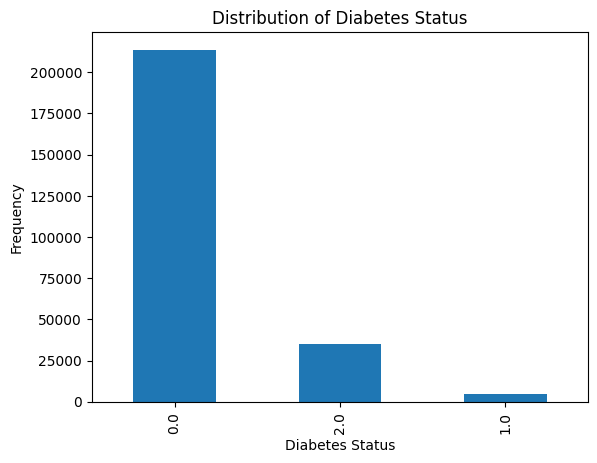

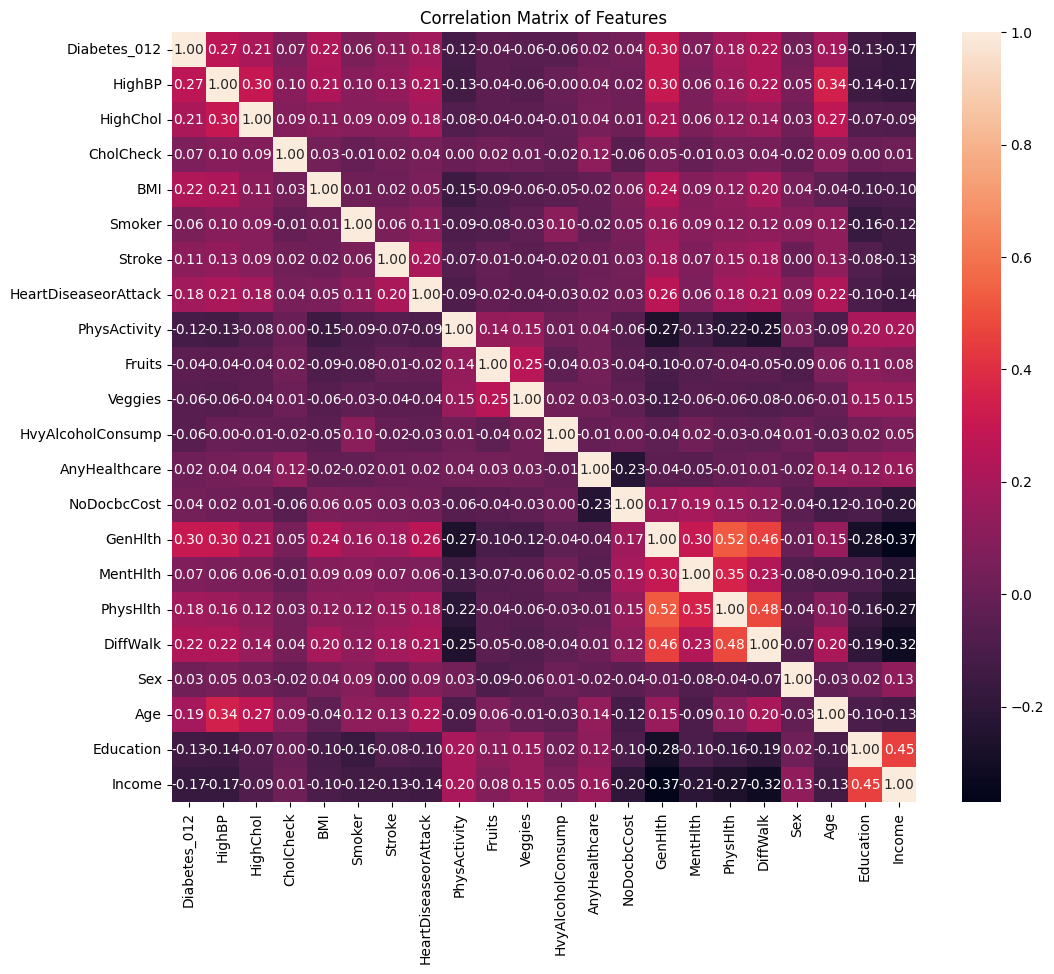

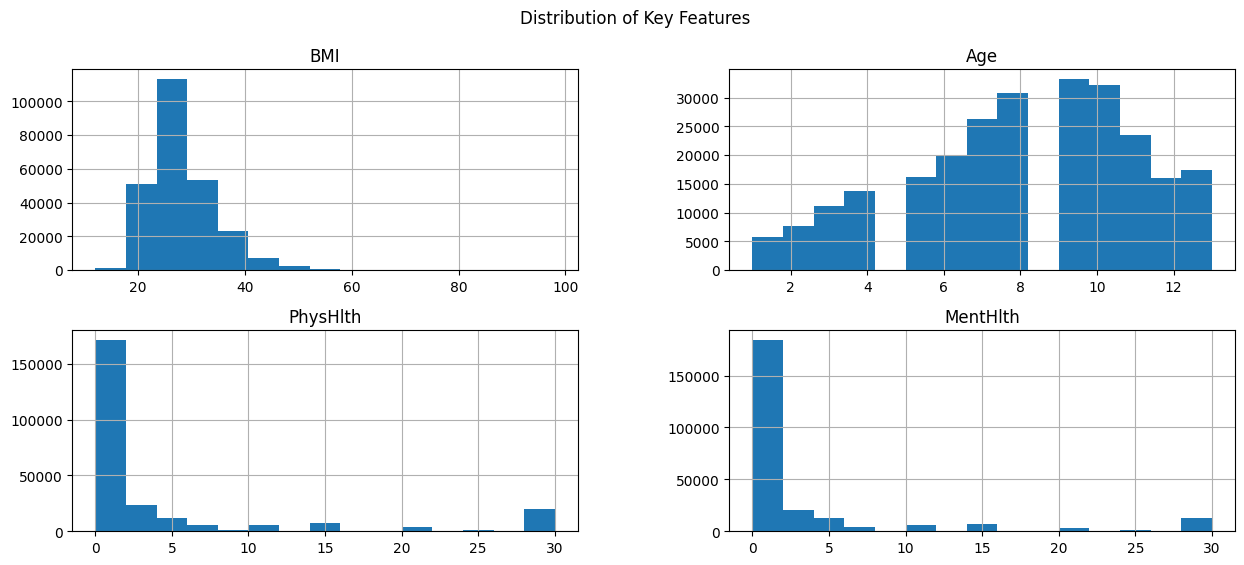

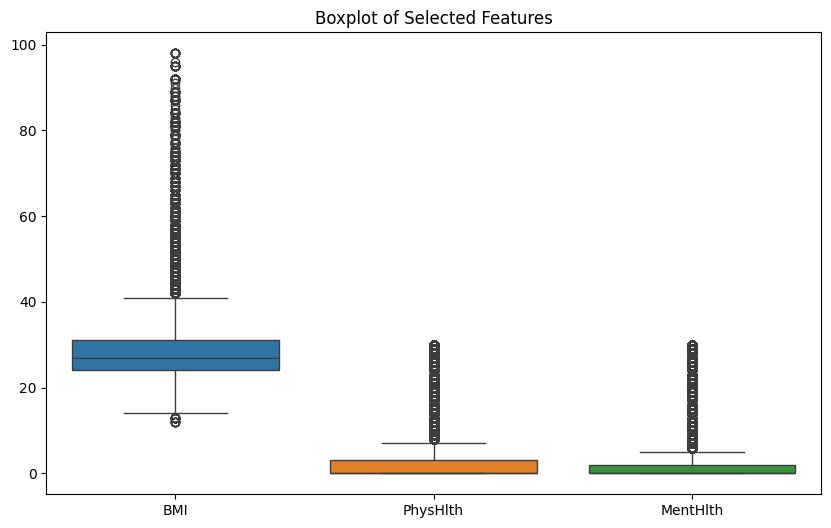

C:\Users\ajayn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


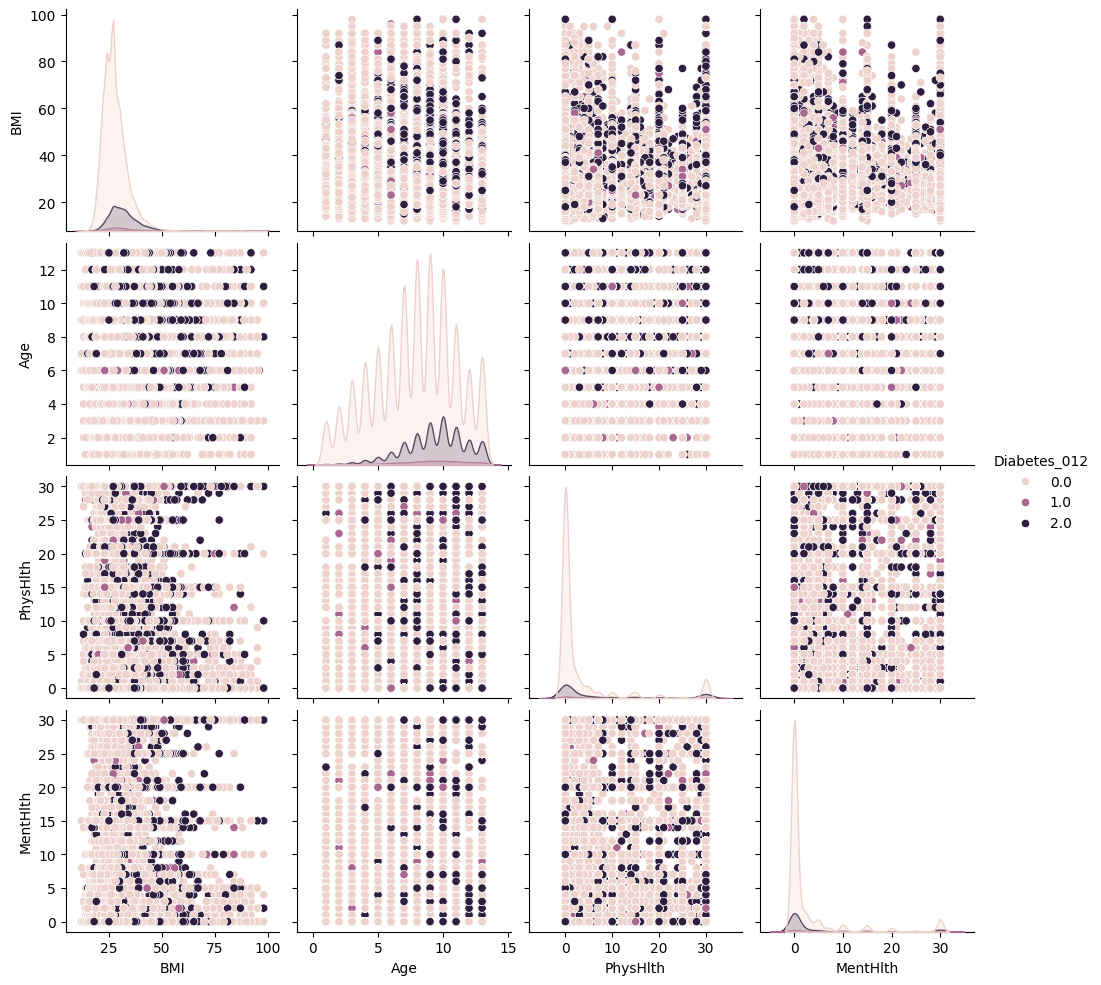

In [16]:
#Task 2: Perform the EDA
import pandas as pd

# Assuming the file path to the dataset is 'diabetes_012_health_indicators_BRFSS2015.csv'
data_path = 'diabetes_012_health_indicators_BRFSS2015.csv'
data = pd.read_csv(data_path)

print(data.info())

print(data.isnull().sum())

print(data.describe())

import matplotlib.pyplot as plt

data['Diabetes_012'].value_counts().plot(kind='bar')
plt.title('Distribution of Diabetes Status')
plt.xlabel('Diabetes Status')
plt.ylabel('Frequency')
plt.show()

import seaborn as sns

plt.figure(figsize=(12, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

data[['BMI', 'Age', 'PhysHlth', 'MentHlth']].hist(bins=15, figsize=(15, 6), layout=(2, 2))
plt.suptitle('Distribution of Key Features')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['BMI', 'PhysHlth', 'MentHlth']])
plt.title('Boxplot of Selected Features')
plt.show()

sns.pairplot(data[['BMI', 'Age', 'PhysHlth', 'MentHlth', 'Diabetes_012']], hue='Diabetes_012')
plt.show()



In [17]:
# Perform train-dev-test split

from sklearn.model_selection import train_test_split

X = data.drop('Diabetes_012', axis=1)
Y = data['Diabetes_012']

# Splitting the dataset into 70% training and 30% testing
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.3, random_state=42)

# Splitting the remaining 30% into half: 15% validation and 15% test
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)


In [19]:
# Implement forward propagation

import torch
import torch.nn as nn

class TwoLayerNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(TwoLayerNet, self).__init__()
        # First layer (input to hidden)
        self.fc1 = nn.Linear(input_size, hidden_size)
        # Second layer (hidden to output)
        self.fc2 = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        # Linear transformation from input to hidden layer
        x = self.fc1(x)
        # ReLU activation function
        x = torch.relu(x)
        # Linear transformation from hidden to output layer
        x = self.fc2(x)
        # Sigmoid activation function for binary classification
        x = torch.sigmoid(x)
        return x

# Define the network with 21 input features, 10 hidden units, and 1 output unit
net = TwoLayerNet(input_size=21, hidden_size=10, output_size=1)


In implementing forward propagation for a 2-layer neural network using PyTorch, I employ ReLU (Rectified Linear Unit) as the activation function for the hidden layer due to its effectiveness in mitigating the vanishing gradient problem and speeding up convergence, and the Sigmoid function for the output layer, which is ideal for binary classification tasks as it outputs probabilities between 0 and 1. Key hyper-parameters include the learning rate, which influences the adjustment speed of network weights and typically starts between 0.001 and 0.01; the number of epochs, determining how many times the network processes the entire dataset, balanced to avoid underfitting or overfitting; batch size, affecting convergence speed and stability; the number of units in the hidden layer, chosen based on task complexity and data volume; and weight initialization strategies like Xavier/Glorot or He initialization, crucial for maintaining gradient scale across layers. Experimentation with these parameters is essential for optimizing model performance, requiring adjustments based on specific dataset characteristics and the problem at hand.

In [24]:
import torch
from torch.autograd import Variable

import numpy as np

# Ensure Y values are binary
Y_train = np.where(Y_train > 0.5, 1, 0)
Y_val = np.where(Y_val > 0.5, 1, 0)


X_train_tensor = torch.FloatTensor(X_train.values)
Y_train_tensor = torch.FloatTensor(Y_train).view(-1, 1)

X_val_tensor = torch.FloatTensor(X_val.values)
Y_val_tensor = torch.FloatTensor(Y_val).view(-1, 1)

# Initialize the criterion
criterion = nn.BCELoss()

# Ensure the model is in evaluation mode to disable dropout layers or batchnorm layers
net.eval()

# Forward pass: compute predicted outputs by passing inputs to the model
outputs_val = net(X_val_tensor)

# Calculate the loss
loss = criterion(outputs_val, Y_val_tensor)

print(f'Validation Loss: {loss.item()}')


Validation Loss: 0.5143551230430603


In [29]:
#Implement Gradient Descent

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Convert scaled data to tensors
X_train_tensor = torch.FloatTensor(X_train_scaled)
Y_train_tensor = torch.FloatTensor(Y_train).view(-1, 1)
X_val_tensor = torch.FloatTensor(X_val_scaled)
Y_val_tensor = torch.FloatTensor(Y_val).view(-1, 1)

model = TwoLayerNet(input_size=21, hidden_size=10, output_size=1)
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss for binary classification tasks
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)  # Using Adam optimizer

num_epochs = 100
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, Y_train_tensor)
    
    # Backward and optimize
    optimizer.zero_grad()  # Clear previous gradients
    loss.backward()  # Compute gradients
    optimizer.step()  # Update parameters
    
    # Print loss every few epochs
    if (epoch+1) % 10 == 0:
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}')


Epoch 10/100, Loss: 0.6854379773139954
Epoch 20/100, Loss: 0.6626073122024536
Epoch 30/100, Loss: 0.6388152837753296
Epoch 40/100, Loss: 0.6139951348304749
Epoch 50/100, Loss: 0.5882431864738464
Epoch 60/100, Loss: 0.5619782209396362
Epoch 70/100, Loss: 0.5359070897102356
Epoch 80/100, Loss: 0.5109263062477112
Epoch 90/100, Loss: 0.4878179728984833
Epoch 100/100, Loss: 0.46708640456199646


In [30]:
# Evaluate the model
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    val_outputs = model(X_val_tensor)
    val_loss = criterion(val_outputs, Y_val_tensor)
    print(f'Validation Loss: {val_loss.item()}')


Validation Loss: 0.46582379937171936


In my implementation, normalizing the input features significantly contributes to the model's enhanced performance. This normalization process ensures that the gradient descent optimization operates more efficiently, as it equalizes the contribution of each feature to the overall loss, facilitating quicker convergence and more stable training. Such preprocessing steps are pivotal in preventing any single feature from disproportionately affecting the model's learning process due to variance in scale, thereby potentially improving the accuracy of my diabetes classification model. Additionally, incorporating regularization techniques, such as dropout or L2 regularization within my model, offers a strategic advantage by mitigating the risk of overfitting, especially crucial given the complexity of neural networks and the intricacies inherent in medical datasets like the one I am working with.

In [37]:
# Present the results using the test set

X_test_tensor = torch.FloatTensor(X_test_scaled)
Y_test_tensor = torch.FloatTensor(Y_test.values).view(-1, 1)

model.eval()  # Set the model to evaluation mode
with torch.no_grad():  # Deactivates autograd
    # Forward pass on the test set
    test_outputs = model(X_test_tensor)
    # Convert outputs to binary predictions
    test_preds = torch.round(torch.sigmoid(test_outputs))

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

test_preds_np = test_preds.numpy().argmax(axis=1)
Y_test_np = Y_test_tensor.numpy().astype(int)

accuracy = accuracy_score(Y_test_np, test_preds_np)

precision = precision_score(Y_test_np, test_preds_np, average='macro', zero_division=0)
recall = recall_score(Y_test_np, test_preds_np, average='macro')
f1 = f1_score(Y_test_np, test_preds_np, average='macro')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision (Macro Average): {precision:.4f}')
print(f'Recall (Macro Average): {recall:.4f}')
print(f'F1 Score (Macro Average): {f1:.4f}')


Accuracy: 0.8449
Precision (Macro Average): 0.2816
Recall (Macro Average): 0.3333
F1 Score (Macro Average): 0.3053


Task 3: : For the 2-layer neural network, 10 hidden units, a 0.001 learning rate, and 100 training epochs were chosen based on standard practices to balance learning capacity and complexity, aiming for efficient convergence and minimizing overfitting risk. These parameters provided a starting point for iterative refinement based on model performance. Initial model setups did not include regularization techniques like L2 or dropout, prioritizing baseline performance assessment. The strategy was to introduce regularization if validation results suggested overfitting, allowing for targeted adjustments to improve model generalizability. Adam was selected for its adaptive learning rate and momentum features, which facilitate effective convergence with minimal hyperparameter tuning. Its proven performance across different scenarios made it an optimal choice for the initial training phase, offering a robust framework for model optimization.




